## <b>Carga de librerias </b>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# red neuronal
import keras 
from keras.models import Sequential
from keras.layers import Dense

# K-folds
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

## <b>Carga de datasets </b>

In [2]:
entreno = pd.read_csv('train.csv')
testeo = pd.read_csv('test.csv')

In [3]:
entreno.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testeo.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## <b> Feature Engineering </b>

### <b>Dataset de entrenamiento </b>

#### Validacion de nulos

In [5]:
entreno.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

#### Seleccion de variables

In [6]:
entreno = entreno[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
entreno.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


#### Imputacion de media o mediana

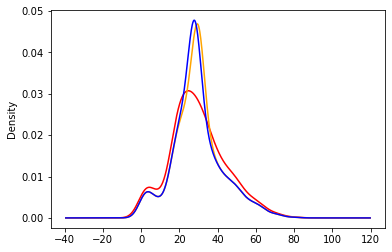

In [7]:
entreno['Age'].plot.density(color='red')
entreno['Age'].fillna(entreno['Age'].mean()).plot.density(color='orange')
entreno['Age'].fillna(entreno['Age'].median()).plot.density(color='blue')
entreno['Age'].fillna(entreno['Age'].median(), inplace=True)

#### Imputacion variable categorica

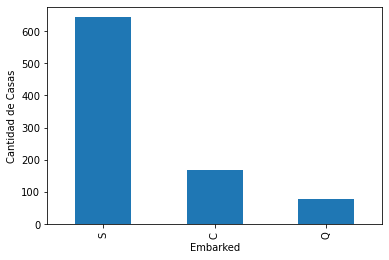

In [8]:
entreno['Embarked'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cantidad de Casas")
plt.xlabel("Embarked")
plt.show()


In [9]:
entreno.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [10]:
entreno['Embarked'].fillna('S', inplace=True)

In [11]:
entreno.isnull().mean()

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Embarked    0.0
dtype: float64

In [12]:
entreno.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


#### One hot encoding

In [13]:
ohe = pd.get_dummies(entreno['Sex'])
entreno.drop(columns=['Sex'], axis=1, inplace=True)
entreno = entreno.join(ohe)

ohe = pd.get_dummies(entreno['Embarked'])
entreno.drop(columns=['Embarked'], axis=1, inplace=True)
entreno = entreno.join(ohe)

### <b>Dataset de pruebas </b>

#### Validación de nulos

In [14]:
testeo.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

#### Selección de variables

In [15]:
testeo = testeo[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
testeo.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


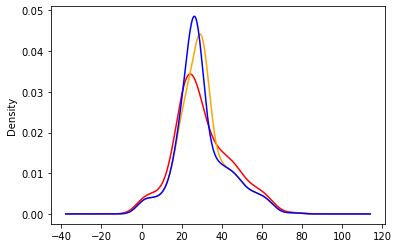

In [16]:
testeo['Age'].plot.density(color='red')
testeo['Age'].fillna(testeo['Age'].mean()).plot.density(color='orange')
testeo['Age'].fillna(testeo['Age'].median()).plot.density(color='blue')
testeo['Age'].fillna(testeo['Age'].median(), inplace=True)

In [17]:
testeo.isnull().mean()

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Embarked    0.0
dtype: float64

#### One hot encoding

In [18]:
ohe = pd.get_dummies(testeo['Sex'])
testeo.drop(columns=['Sex'], axis=1, inplace=True)
testeo = testeo.join(ohe)

ohe = pd.get_dummies(testeo['Embarked'])
testeo.drop(columns=['Embarked'], axis=1, inplace=True)
testeo = testeo.join(ohe)

## <b> Extracción de variables </b>

In [19]:
X = entreno.iloc[:, entreno.columns != 'Survived']
y = entreno.loc[:, 'Survived']

### Estandarización de los datos

In [20]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

In [21]:
X_train = X 
y_train = y

## <b> Arquitectura de red neuronal </b>

### <b>Red_1: 2 capas ocultas y 1 Capa de salida </b>

In [22]:
X_train.shape

(891, 9)

In [23]:
inputs = X_train.shape[1]

clasificador = Sequential()
clasificador.add(Dense(input_dim=inputs, units=6, activation = 'relu', kernel_initializer='uniform') )

clasificador.add(Dense(units=6, activation = 'sigmoid', kernel_initializer='uniform') )
clasificador.add(Dense(units=6, activation = 'sigmoid', kernel_initializer='uniform') )
clasificador.add(Dense(units=6, activation = 'sigmoid', kernel_initializer='uniform') )

clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

clasificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Entrenamiento

In [24]:
clasificador.fit(X_train, y_train, batch_size=20, epochs=300)

Epoch 1/300
45/45 [==============================] - 1s 2ms/step - loss: 0.6832 - accuracy: 0.6162
Epoch 2/300
45/45 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.6162
Epoch 3/300
45/45 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6162
Epoch 4/300
45/45 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6162
Epoch 5/300
45/45 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.6162
Epoch 6/300
45/45 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.6162
Epoch 7/300
45/45 [==============================] - 0s 3ms/step - loss: 0.6630 - accuracy: 0.6162
Epoch 8/300
45/45 [==============================] - 0s 3ms/step - loss: 0.6615 - accuracy: 0.6162
Epoch 9/300
45/45 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.6162
Epoch 10/300
45/45 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.6162
Epoch 11/

In [25]:
# Guarda la red
clasificador.save('6_6_sig_sig_out_300_epochs.h5')
new_model = keras.models.load_model('6_6_sig_sig_out_300_epochs.h5')

In [26]:
X_test = std_scaler.fit_transform(testeo)

### Predicciones

In [27]:
y_preds = new_model.predict(X_test)
prediccion = np.where(y_preds>0.6,1,0)
testeo = pd.read_csv('test.csv', usecols=['PassengerId'])
testeo = testeo.assign(column_name=prediccion)
testeo.rename(columns={'column_name':'Survived'}, inplace=True)
testeo.to_csv('predicciones.csv', index=False)

14/14 [==============================] - 0s 1ms/step
